# Домашнее задание №2: "Валидация рекомендательных систем"

In [1]:
import pandas as pd
import numpy as np
import time

print(pd.__version__)
print(np.__version__)

2.2.3
2.2.4


## Кейс 1. Олд-скульный тест на математику (6 баллов)

Перед тобой топ 5 рекомендаций от обученного алгоритма для 3-х тестовых юзеров в раскраске позитивам / негативам. У каждого тестового юзера было ровно 2 ground truth интеракции в тестовом периоде. Оранжевые кружки - это айтемы, с которыми юзер взаимодействовал в тестовом периоде, белые - с которыми не взаимодействовал.

Твоя задача - посчитать метрики для оценки качества алгоритма. Сторонние библиотеки для расчёта метрик или код с семинара использовать не стоит - в ранжирующих метриках бывают различия в логике расчётов (см. notes в шпаргалке). Ориентируйся только на формулы в ноутбуке, чтобы ответ сошёлся.
В этом задании лучше не писать универсальные функции для получения ответа, а посчитать на конкретном примере вручную.

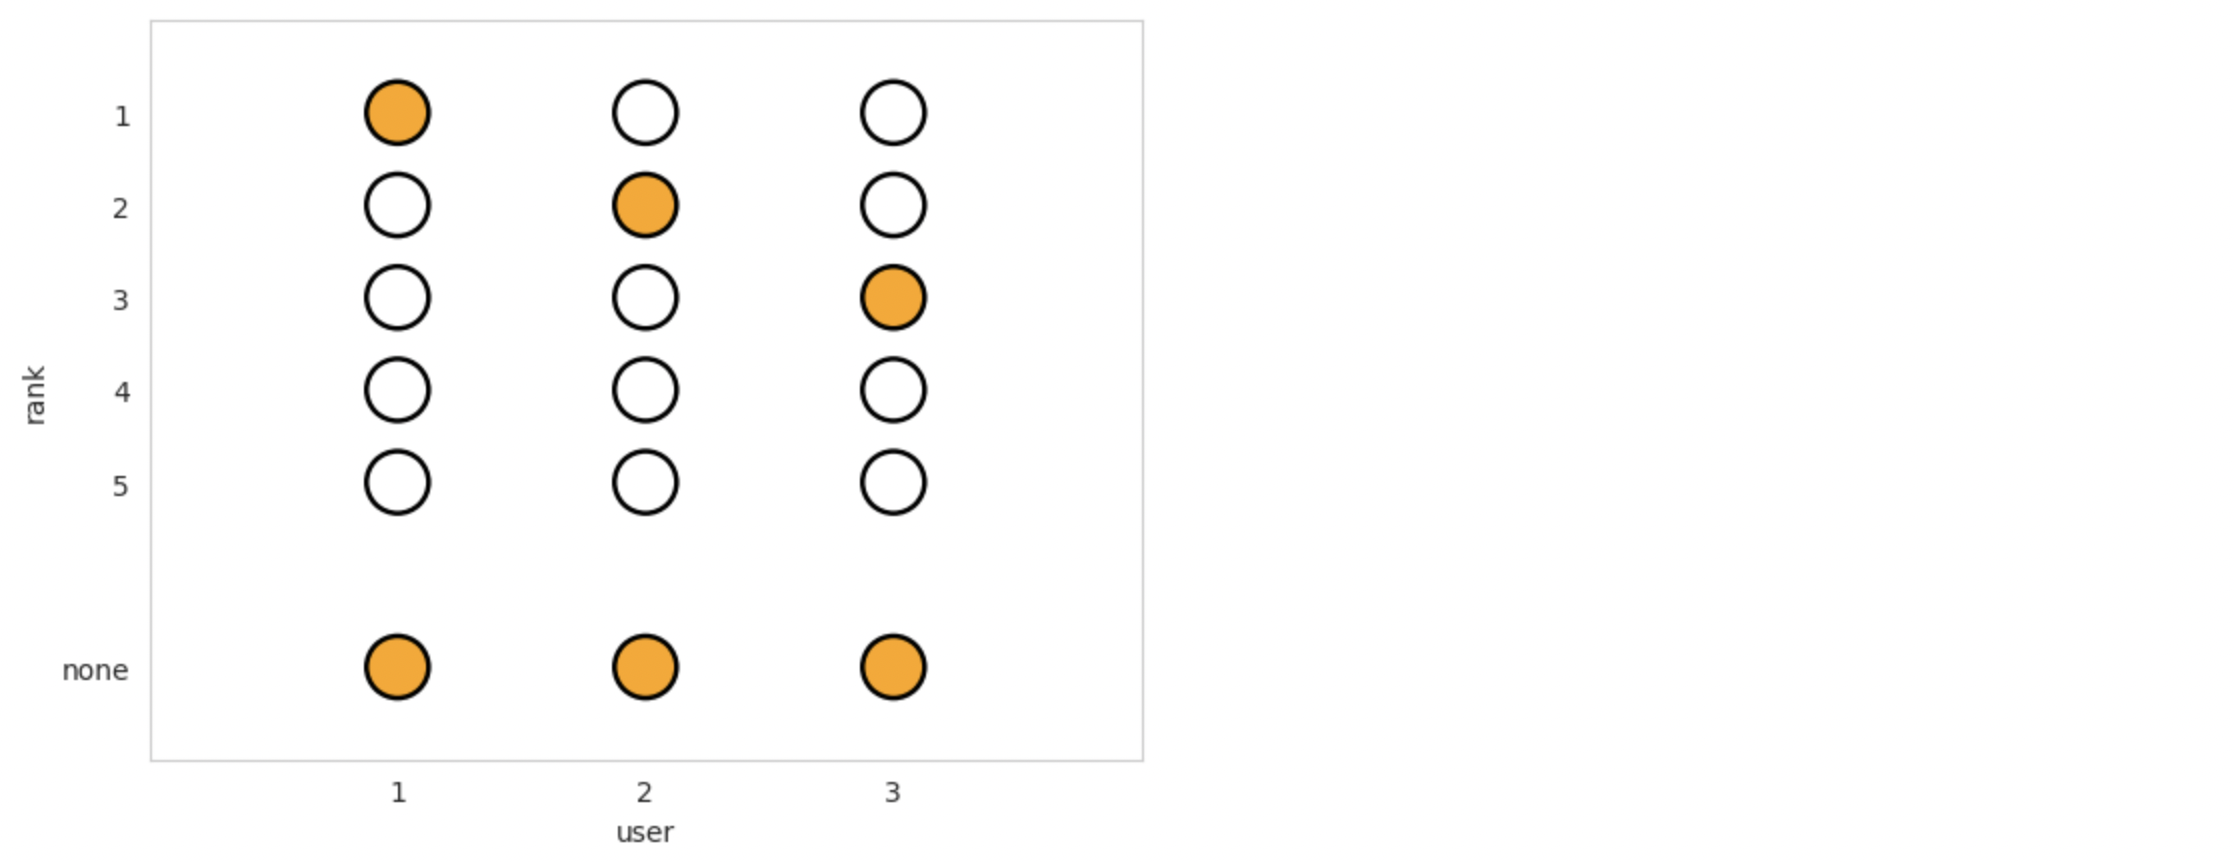

Твоя шпаргалка:

-----

${Precision@k} =  \frac{1}{|U|}\sum_{u \in U}\frac{1}{k}\sum_{i=1}^{k} rel_u(i)$

-----

${Recall@k} =  \frac{1}{|U|}\sum_{u \in U}\frac{1}{|R_u|}\sum_{i=1}^{k} rel_u(i)$

-----

$MAP@k = \frac{1}{|U|}\sum_{u \in U}AP_u@k$

$AP_u@k = \frac{1}{k}(\sum_{i=1}^{k} Precision@i * rel_u(i))$

-----

$NDCG@k=\frac{1}{|U|}\sum_{u \in U}\frac{DCG_u@k}{IDCG_u@k}$

$DCG_u@k = \sum_{i=1}^{k} \frac{rel_u(i)}{log_2(i + 1)}$

$IDCG_u@k = \sum_{i=1}^{\min (|R_u|, k)} \frac{1}{log_2(i + 1)}$

-----

- $rel_u(i)$ is an indicator function, it equals to $1$ if the item at rank $i$ is relevant to user $u$, $0$ otherwise
- $|R_u|$ is number of relevant (ground truth) items for user $u$

-----

Note: $AP_u@k$ is not always divided by $k$, sometimes $|R(u)|$ or $min(|R_u|,k)$ is used instead

Note: $IDCG_u@k$ is not always summed for $min(|R_u|,k)$, sometimes $k$ is used instead

In [2]:
# Классификационные метрики: все 3 правильных ответа дают вместе 1 балл


def precision_at_1() -> float:
    # raise NotImplementedError()
    return 1 / 3


def precision_at_5() -> float:
    # raise NotImplementedError()
    return 1 / 5


def recall_at_1() -> float:
    # raise NotImplementedError()
    return 1 / 6

In [3]:
# Ранжирующие метрики: каждый правильный ответ даёт 1 балл

# AveragePrecision@3 для юзера `2`
def ap_at_3_for_user_2() -> float:
    # raise NotImplementedError()
    return 1 / 6


# MeanAveragePrecision@3
def map_at_3() -> float:
    # raise NotImplementedError()
    return (1 + 1 / 2 + 1 / 3) / 9


# DiscountedCumulativeGain@3 для юзера `2`
def dcg_at_3_for_user_2() -> float:
    # raise NotImplementedError()
    return float(1 / np.log2(3))


# IdealDiscountedCumulativeGain@3 для юзера `2`
def idcg_at_3_for_user_2() -> float:
    # raise NotImplementedError()
    return float(1 / np.log2(2) + 1 / np.log2(3))


# NormalizedDiscountedCumulativeGain@3
def ndcg_at_3() -> float:
    idcg = 1 / np.log2(2) + 1 / np.log2(3)
    user_1 = 1 / np.log2(2) / idcg
    user_2 = 1 / np.log2(3) / idcg
    user_3 = 1 / np.log2(4) / idcg
    # raise NotImplementedError()
    return float((user_1 + user_2 + user_3) / 3)

### Проверка решений
При проверке преподавателем объём тестов будет расширен

In [4]:
# Проверяем классификационные метрики
# 3 правильных ответа дают 1 балл

assert isinstance(precision_at_1(), float)
assert isinstance(precision_at_5(), float)
assert isinstance(recall_at_1(), float)


In [5]:
# Проверяем Average Precision (ap_at_3_for_user_2)
# Правильный ответ даёт 1 балл

assert isinstance(ap_at_3_for_user_2(), float)


In [6]:
# Проверяем Mean Average Precision (map_at_3)
# Правильный ответ даёт 1 балл

assert isinstance(map_at_3(), float)


In [7]:
# Проверяем Discounted Cumulative Gain (dcg_at_3_for_user_2)
# Правильный ответ даёт 1 балл

assert isinstance(dcg_at_3_for_user_2(), float)


In [8]:
# Проверяем Ideal Discounted Cumulative Gain (idcg_at_3_for_user_2)
# Правильный ответ даёт 1 балл

assert isinstance(idcg_at_3_for_user_2(), float)


In [9]:
# Проверяем Normalized Discounted Cumulative Gain (ndcg_at_3)
# Правильный ответ даёт 1 балл

assert isinstance(ndcg_at_3(), float)


## Кейс 2. Имплементация взвешенного Recall (5 баллов)

Ты разрабатываешь полку с персональными рекомендациями в интернет-магазине. 
Качество рекомендаций важно оценивать в деньгах.
Имплементируй функцию, которая рассчитывает взвешенный Recall на основе рекомендаций модели и реальных покупок пользователей.

Метрика усреднена по юзерам и идентична обычному Recall, но релеватность айтема для юзера оценивает не в бинарном виде (hit / miss), а в денежном. Какую долю реально потраченных пользователями денег, в среднем умеет предсказывать модель?

In [10]:
# Отранжированные рекомендации товаров, полученные из обучения алгоритма на исторических данных

top_k = 5
n_users = 3
reco = pd.DataFrame(
    {
        'user_id': np.repeat(np.arange(n_users), top_k),
        'item_id': np.tile(np.arange(top_k), n_users),
    }
)
reco['rank'] = reco.groupby('user_id').cumcount() + 1
reco

,user_id,item_id,rank
0,0,0,1
1,0,1,2
2,0,2,3
3,0,3,4
4,0,4,5
5,1,0,1
6,1,1,2
7,1,2,3
8,1,3,4
9,1,4,5


In [11]:
# Реальные покупки пользователей в тестовом периоде

test = pd.DataFrame(
    {
        'user_id': [0, 1, 2, 0, 1, 2],
        'item_id': [0, 1, 2, 3, 4, 5],
        'money': [100, 200, 100, 200, 100, 500],
    }
)
test

,user_id,item_id,money
0,0,0,100
1,1,1,200
2,2,2,100
3,0,3,200
4,1,4,100
5,2,5,500


Имплементируйте функцию для расчёта взвешенного Recall. Помните, что метрика сначала считается для каждого юзера, а потом усредняется для получения финального значения.  
Вспомните подходы с семинара, которые позволяют рассчитывать метрики в векторном виде.  
Корректная, но неэффективная имплементация даст 2 балла из 5.  
Корректная и эффективная - 5 из 5.

In [12]:
def weigted_recall(
    reco: pd.DataFrame, test: pd.DataFrame, k: int, weight_col: str = 'money'
) -> float:
    reco_k = reco[reco['rank'] <= k]  # top-k рекомендации

    merged = reco_k.merge(test, on=['user_id', 'item_id'], how='left').fillna(0)

    # сумма денег от модели для каждого пользователя
    money_pred = merged.groupby('user_id')[weight_col].sum()

    # сумма всех потраченных денег для каждого пользователя
    money_real = test.groupby('user_id')[weight_col].sum()

    recall_per_user = money_pred / money_real  # какую долю трат предсказали

    # raise NotImplementedError()
    return recall_per_user.mean()


weigted_recall(reco, test, k=5)


np.float64(0.7222222222222222)

### Проверка решения
При проверке преподавателем объём тестов будет расширен

In [13]:
# Проверяем корректность расчётов
# Функция с корректными расчётами даёт 2 балла
# Хардкод получит 0 баллов при проверке преподавателем

actual = weigted_recall(reco, test, k=5)
expected = (1 + 1 + 1 / 6) / 3
assert isinstance(actual, float)
assert abs(expected - actual) < 0.001


In [14]:
# Проверяем эффективность имплементации
# Эффективная имплементация в векторной форме с корректными расчётами даёт 3 балла
# Хардкод получит 0 баллов при проверке преподавателем
# Наивная имплементация получит 0 баллов при проверке преподавателем


class Timer:
    def __enter__(self):
        self._start = time.perf_counter()
        self._end = None
        return self

    def __exit__(self, *args):
        self._end = time.perf_counter()

    @property
    def elapsed(self):
        return self._end - self._start


with Timer() as timer:
    actual = weigted_recall(reco, test, k=5)

assert isinstance(actual, float)
assert timer.elapsed < 0.1


## Кейс 3. Валидация моделей для А/Б теста на продукте (4 балла)

Твоя команда разрабатывает рекомендательную систему для онлайн-кинотеатра и подготовила 5 моделей, из которых 2 надо выбрать для первого АБ теста в сервисе. Есть два отчёта по результатам ресёрча:

1. Демо с рекомендациями алгоритмов реальным пользователям сервиса: https://recsysart.ru/voila/
2. Метрики с кросс-валидации скользящим окном по time split:

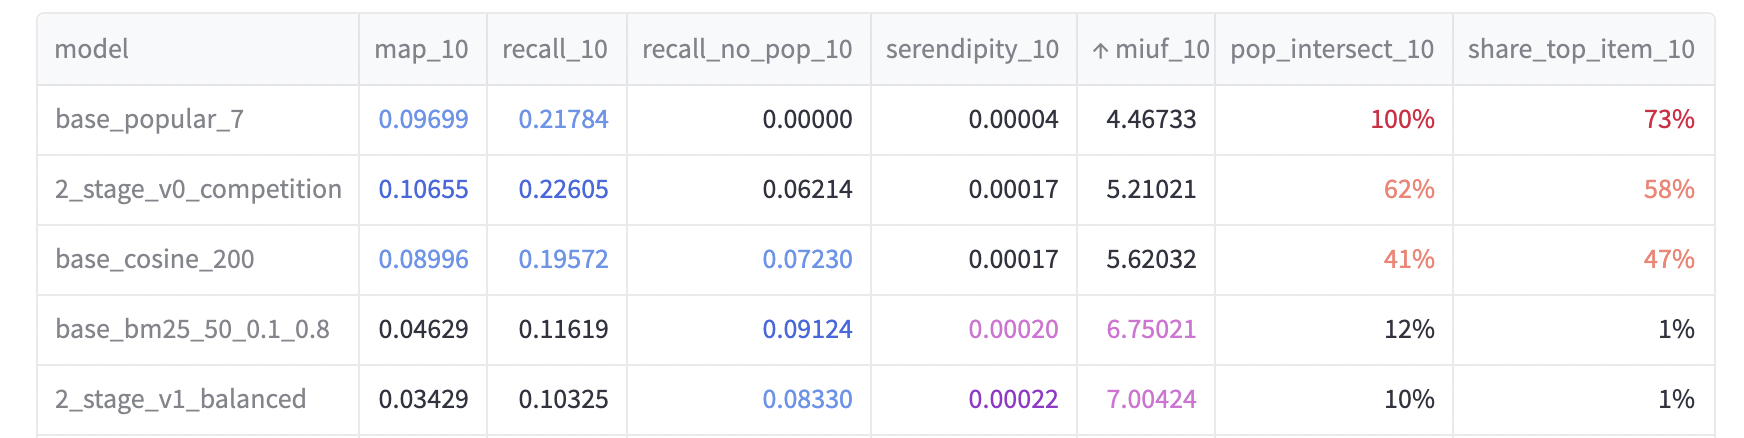

### Твои вводные от бизнеса такие:

Мы делаем в сервисе ставку на высокую персонализацию. Хотим наповал сражать наших пользователей неожиданными, классными рекомендациями, которые им сразу захочется посмотреть. Если больше половины пользователей будет видить в персональной подборке один и тот же айтем - это плохо. Давайте сразу договоримся: популярного не больше половины полки. Это жёстко.

Что хотим от этого АБ: понять степень персонализации, которая понравится нашим пользователям. Так что выбирайте модель с лучшим "WOW"-эффектом для группы Б (treatment). А в качестве бейзлайна дайте ей в соперники модель, которую вы бы выбрали по классике. Это будет модель для группы А (control). Пусть модели будут разноплановыми, чтобы мы прокрасили АБ тест и сделали нужные выводы.

### Твои заметки от команды такие:

Собрали разных метрик. Все считали на k=10,  раз уж в полке показывается 10 айтемов. И раз встал вопрос о popularity bias, добавили там метрики пересечения рекомендаций с популярным алгоритмом и доли юзеров, которым показывается топовый айтем. Плюс всё по классике. Ну и ради интереса посмотрели recall_no_pop - сколько алгоритмы вытаскивают recall вне топа популярного, но это уже изыски, можешь не смотреть. А вот демо посмотри, там набрали юзеров с разными интересами и всех сравнили.


In [15]:
# Какую модель выберешь для группы A (control)? Напиши номер строки из таблицы метрик (число от 1 до 5)


def model_a() -> int:
    # raise NotImplementedError()
    return 3  # base_cosine_200


# КОММЕНТАРИЙ:
# оцениваем степень персонализации, поэтому логичнее всего сравнить с базовой моделью,
# которая правда все еще вписывается в правило "< 50% полки - популярное". из описания
# теста сложилось впечатление, что проводим A/B впервые, поэтому будет полезно сделать
# "пробный запуск", сильно не рискуя выбором сразу 2х необычных моделей. + так мы
# оценим, как нашим пользователям заходит топ - может, они и не любят персонализацию

In [16]:
# Какую модель выберешь для группы Б (treatment)? Напиши номер строки из таблицы метрик (число от 1 до 5)


def model_b() -> int:
    # raise NotImplementedError()
    return 5  # 2_stage_v1_balanced - как модель с наибольшим serendipity

### Проверка решений
При проверке преподавателем объём тестов будет расширен

In [17]:
# Проверяем ответ для модели А
# Правильный ответ: 2 балла

a = model_a()
assert isinstance(a, int)
assert a > 0 and a < 6


In [18]:
# Проверяем ответ для модели Б
# Правильный ответ: 2 балла

b = model_b()
assert isinstance(b, int)
assert b > 0 and b < 6


# Как сдать ноутбук на проверку
1. Прогоните весь код ноутбука - проверьте, что нет ошибок и тесты проходят
2. Для кейса 2 проверьте, что ваш код будет корректно работать на новых данных
3. Выложите готовый ноутбук в ваш репозиторий с сервисом из домашнего задания №1. Положите его по пути `notebooks/hw_2/metrics.ipynb` в ветке `hw_2`
4. Откройте доступ к вашему репозиторию для аккаунтов `https://github.com/feldlime` и `https://github.com/blondered`
5. Откройте PR в main ветку и добавьте в ревьюеры **своего ментора**
6. Не проводите мердж в `main` ветку, пока не увидите оценку за это ДЗ в ведомости. Файл с ноутбуком должен находиться в ветке `hw_2`

Обратите внимание, что сборка ноутбуков на проверку автоматизирована. В случае неправильного пути, имени файла или ветки (а также при отсутствии доступа у `@feldlime` и `@blondered`) ваша работа не попадёт на проверку и получит `0` баллов.

**Максимальная оценка: 15 баллов**